<a href="https://colab.research.google.com/github/daniyal828/Machine-Learning-Projects/blob/main/Heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings for prettier plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [9]:
# Load the dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Display the first few rows
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [10]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null values
print("\nInfo:")
print(df.info())

# Basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Quick view of class distribution (assuming 'target' or similar column)
if 'target' in df.columns or 'HeartDisease' in df.columns:
    target_col = 'target' if 'target' in df.columns else 'HeartDisease'
    print("\nTarget Distribution:")
    print(df[target_col].value_counts())


Shape of dataset: (270, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    obje

In [11]:
# Check unique values in target
print("Target column unique values:")
print(df['Heart Disease'].value_counts())

# Convert target column to binary (if it's 'Yes'/'No' or similar)
df['Heart Disease'] = df['Heart Disease'].map({'No': 0, 'Yes': 1})

# Confirm conversion
print("\nTarget column after encoding:")
print(df['Heart Disease'].value_counts())


Target column unique values:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Target column after encoding:
Series([], Name: count, dtype: int64)


In [12]:
# List all the columns/features
print("Features in the dataset:")
print(df.columns)

# Check data types of each feature
print("\nData types of features:")
print(df.dtypes)

# Check unique values for each feature (for categorical ones)
print("\nUnique values in categorical features:")
for col in df.select_dtypes(include=['object', 'int64']).columns:
    print(f"\n{col}:")
    print(df[col].unique())


Features in the dataset:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Data types of features:
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease              float64
dtype: object

Unique values in categorical features:

Age:
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]

Sex:
[1 0]

Chest pain type

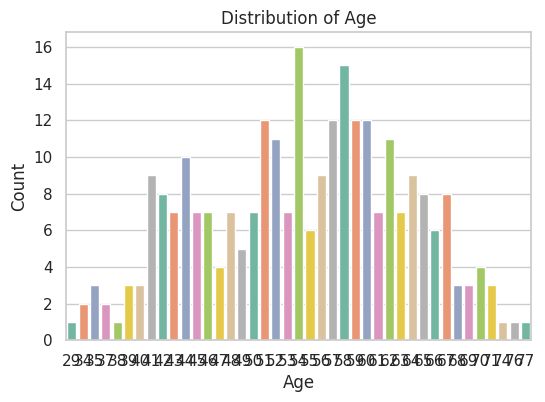

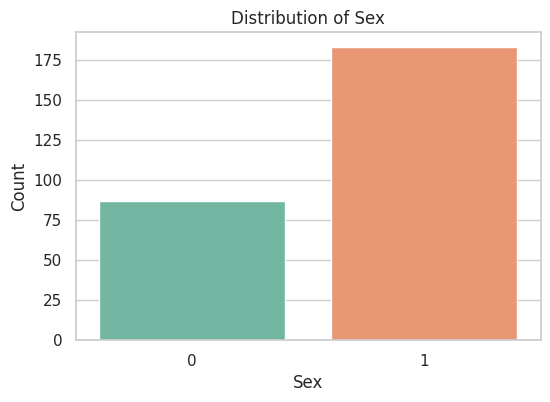

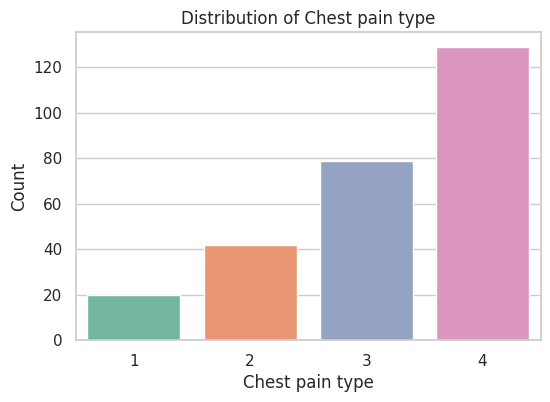

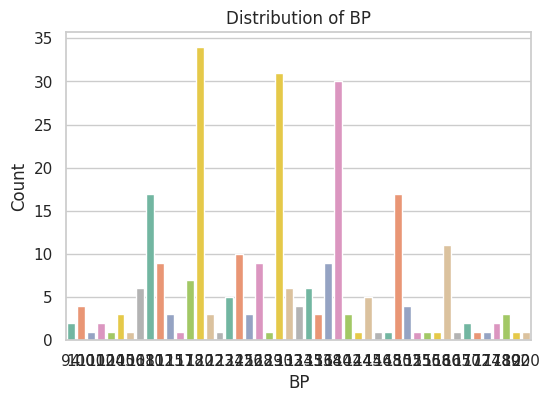

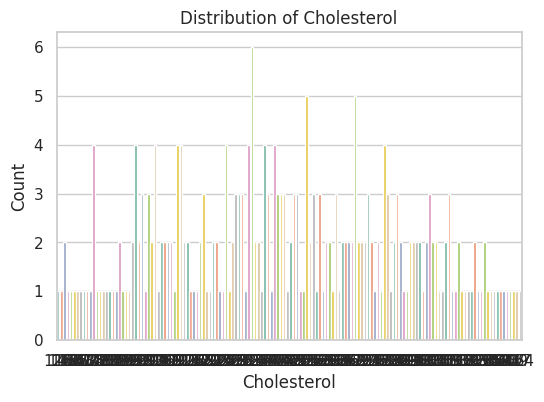

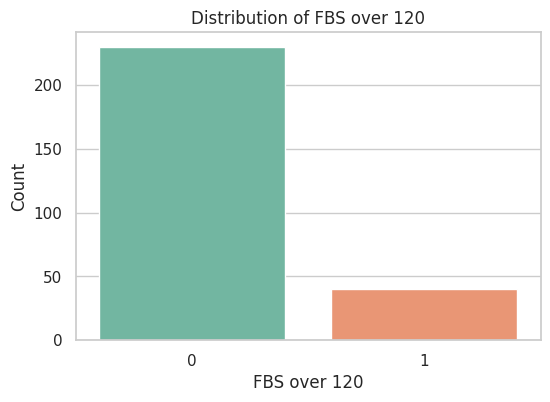

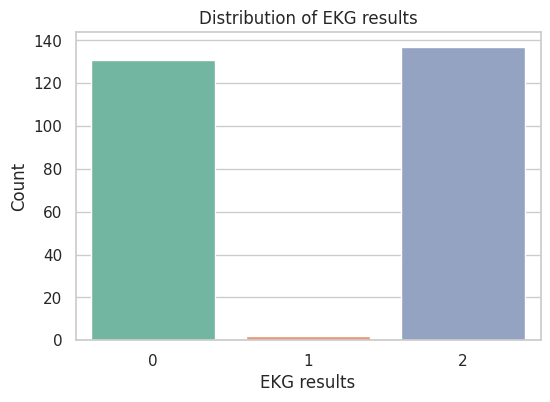

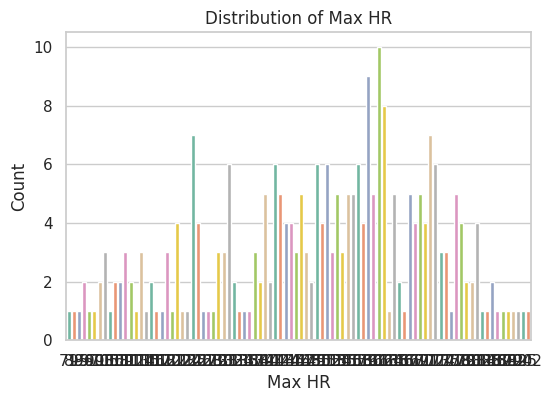

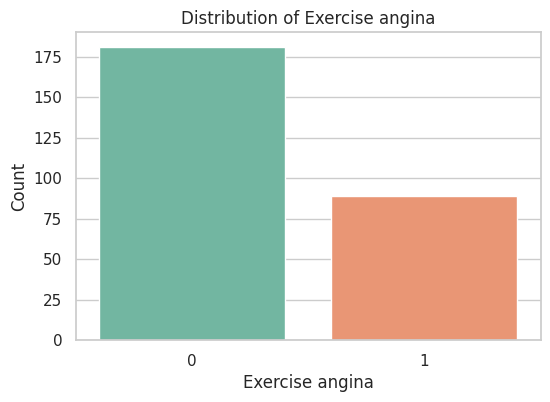

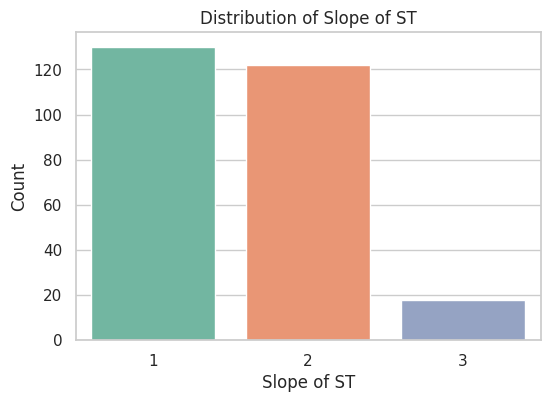

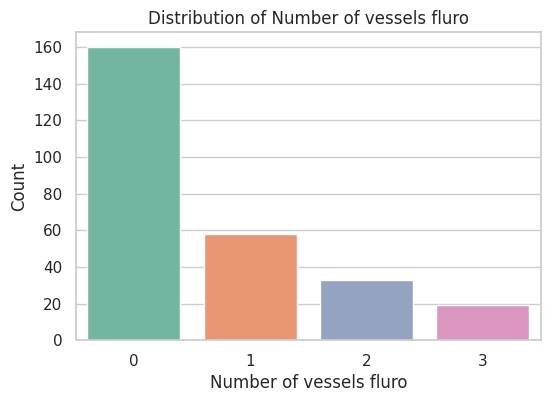

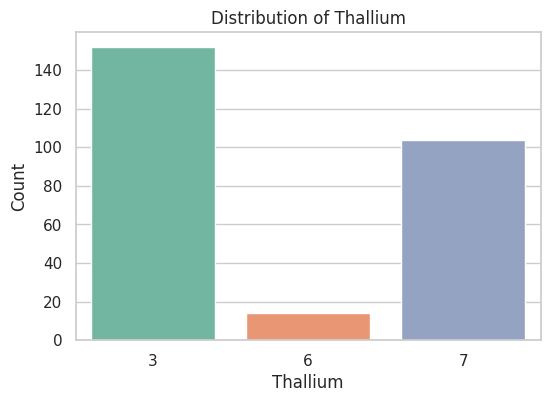

In [13]:
# Visualize categorical features using bar plots
categorical_columns = df.select_dtypes(include=['object', 'int64']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


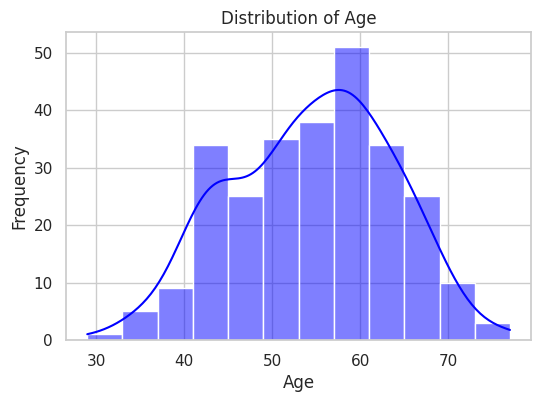

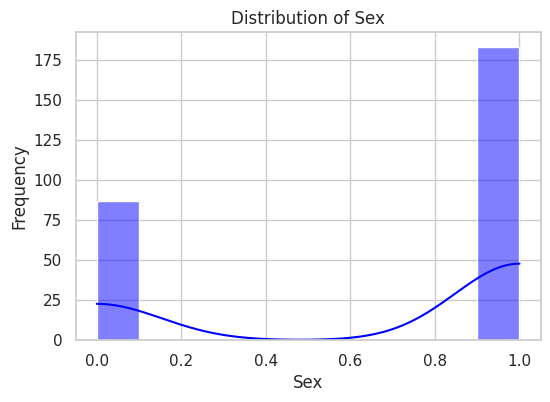

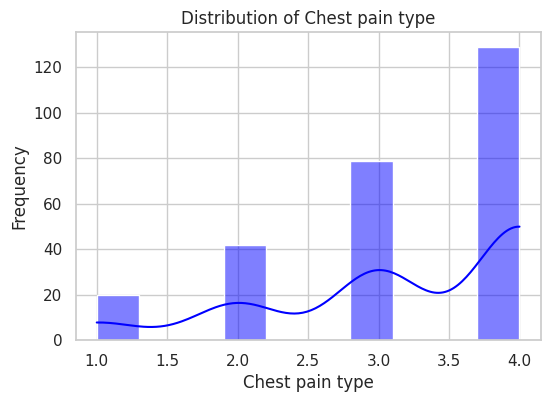

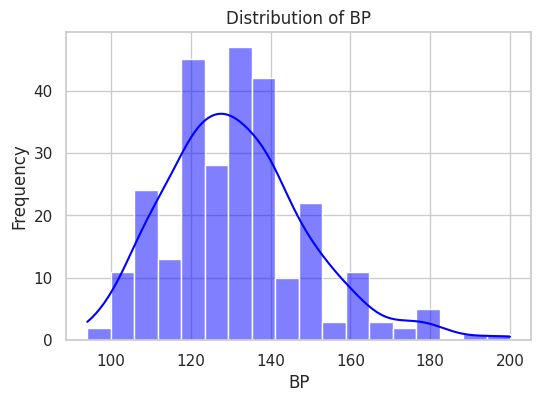

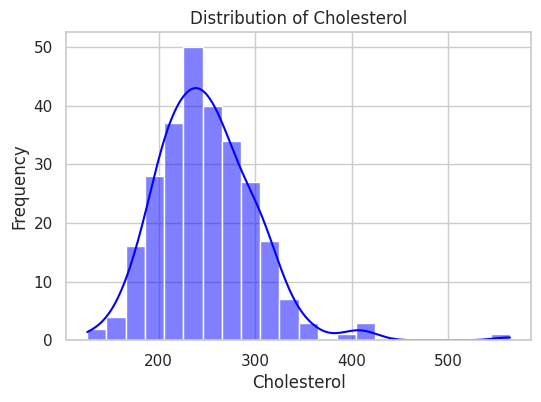

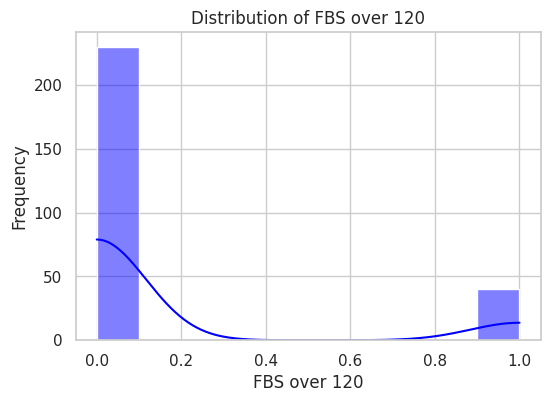

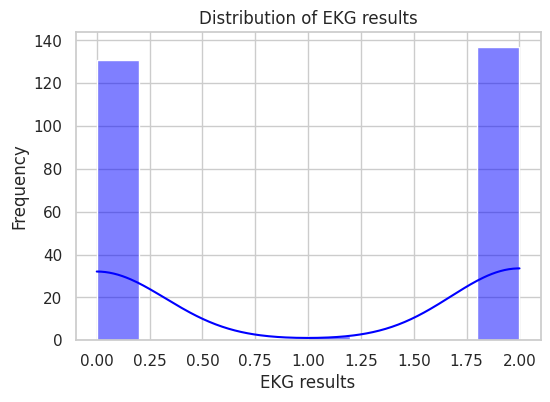

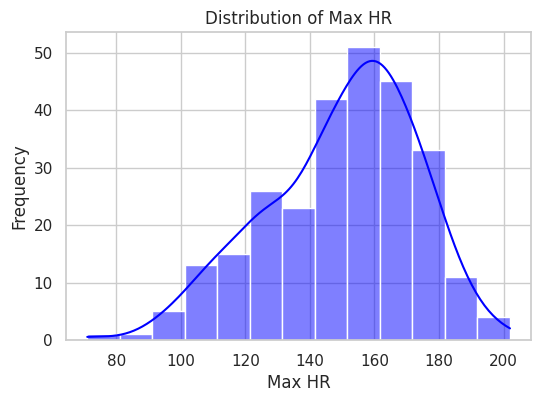

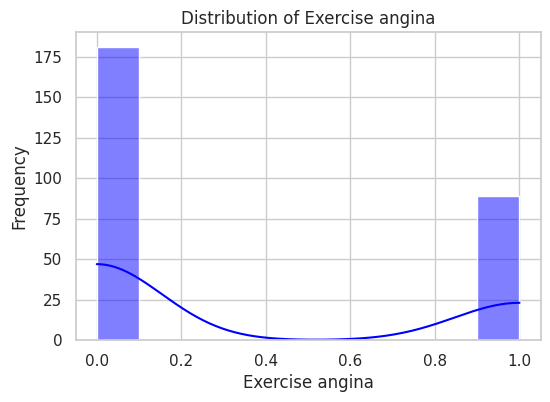

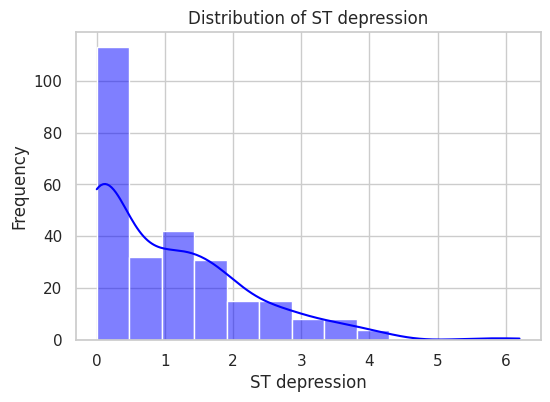

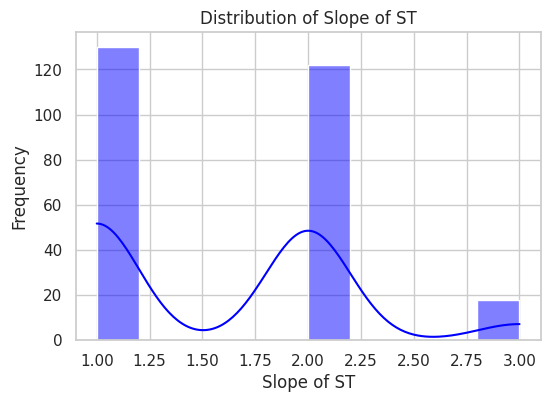

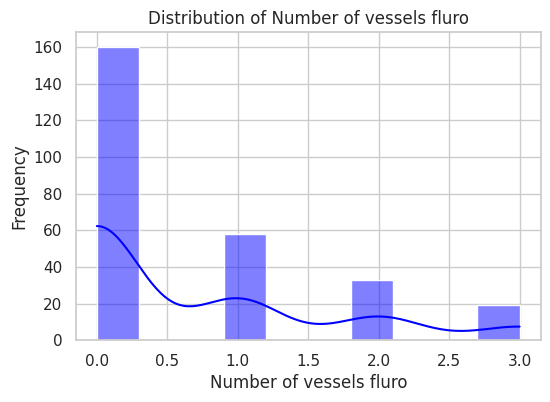

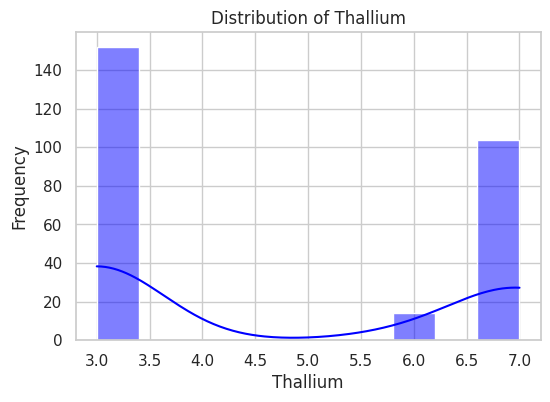

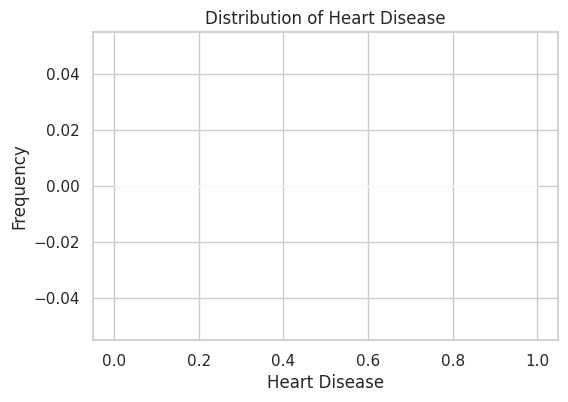

In [15]:
# Visualize numerical features using histograms and boxplots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Histogram for distribution
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




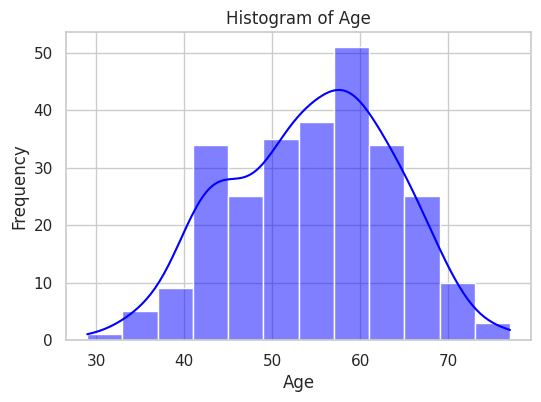

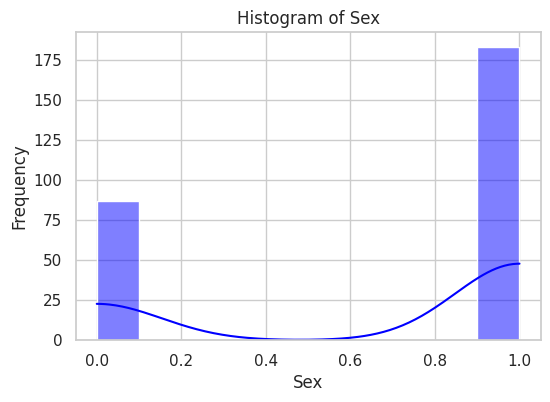

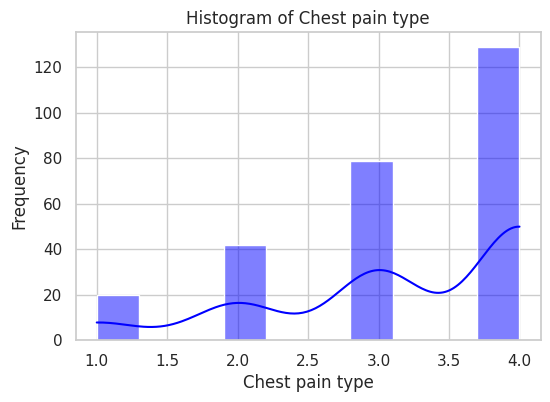

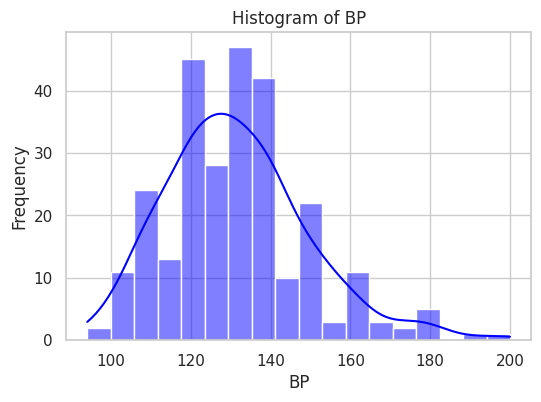

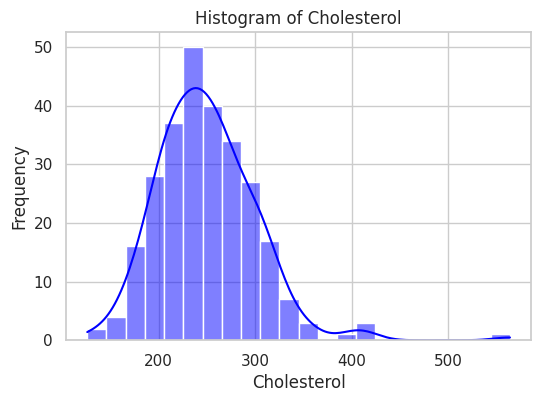

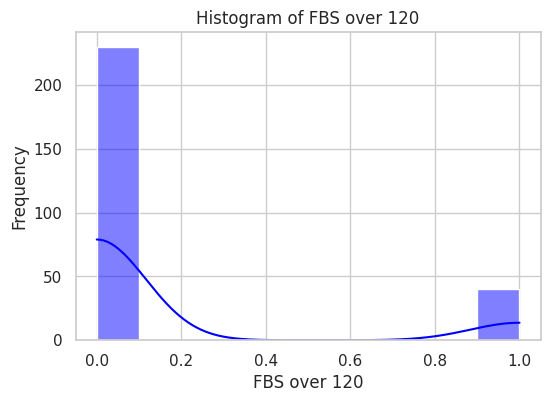

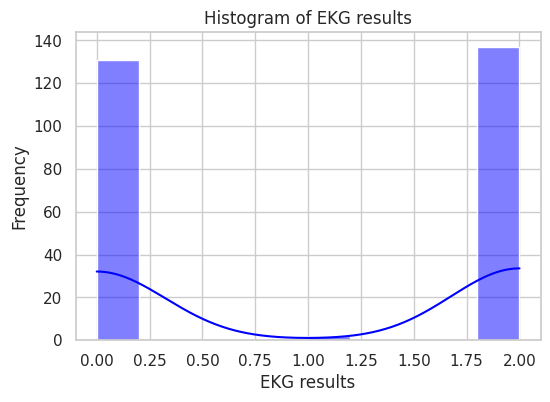

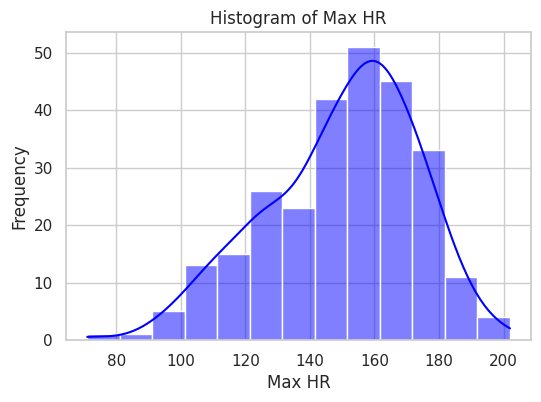

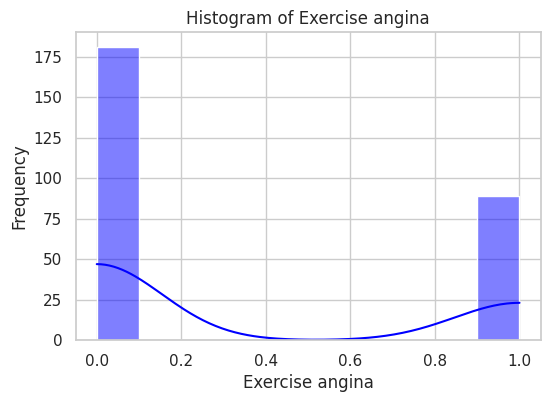

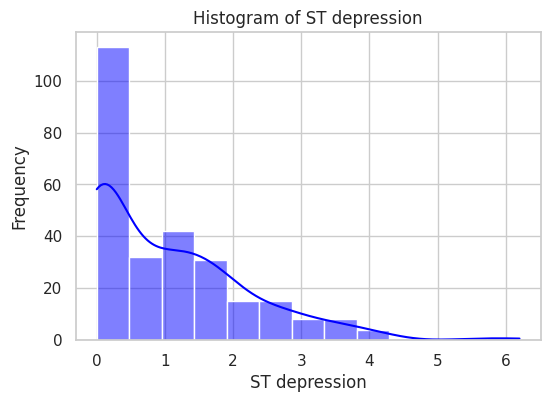

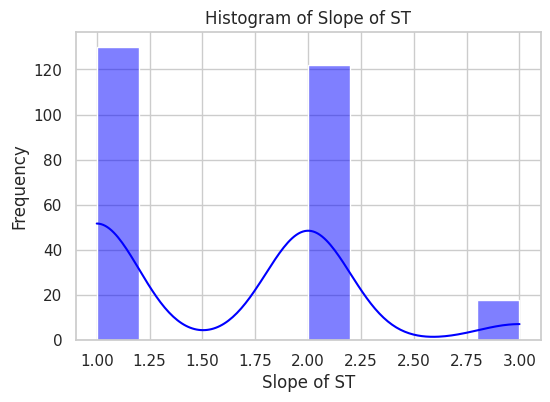

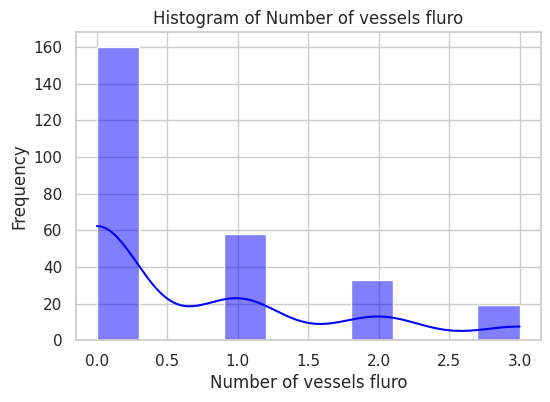

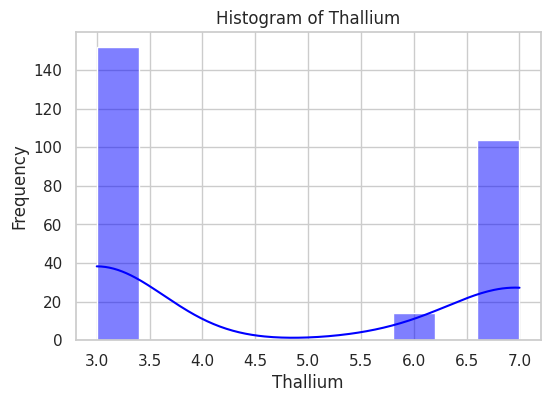

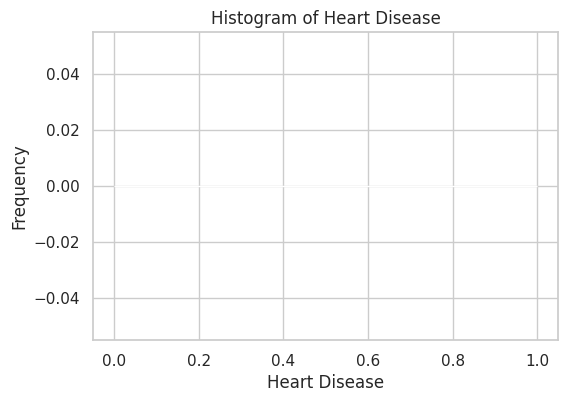

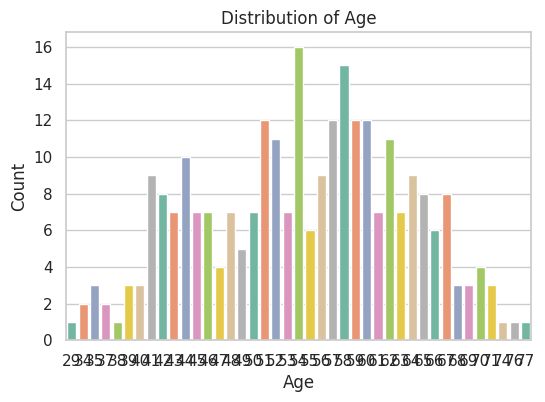

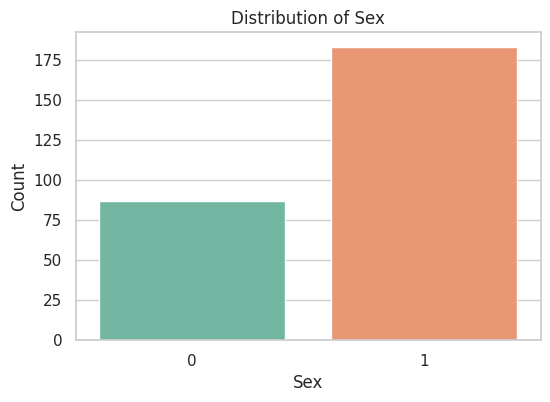

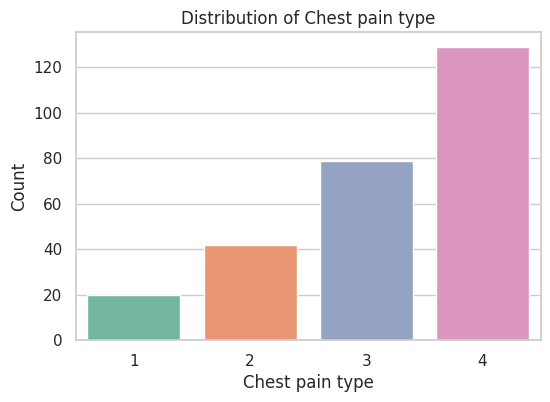

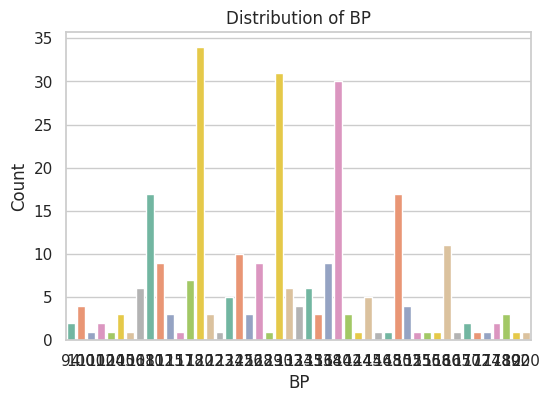

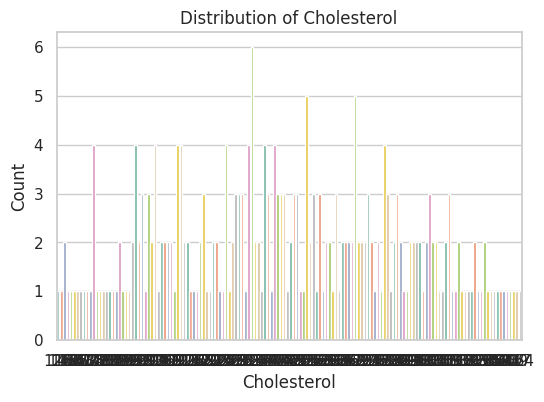

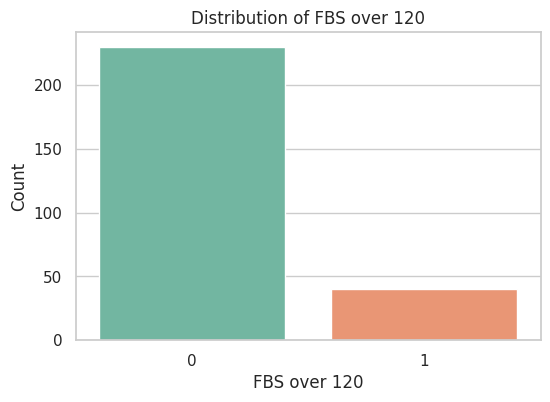

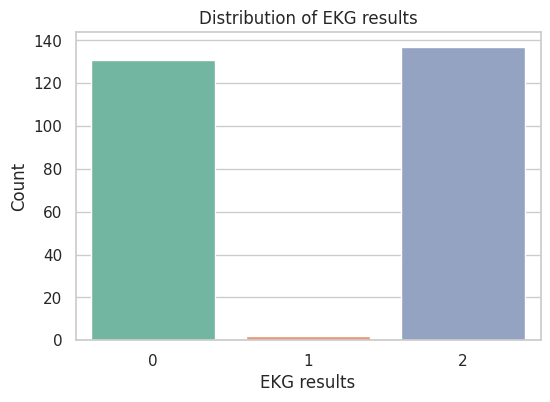

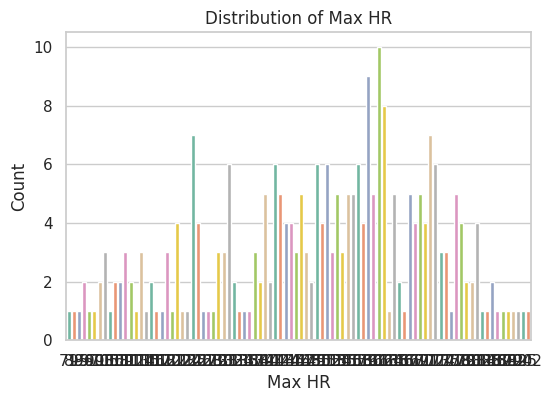

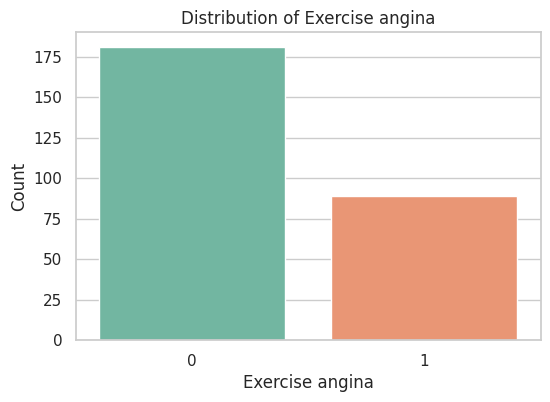

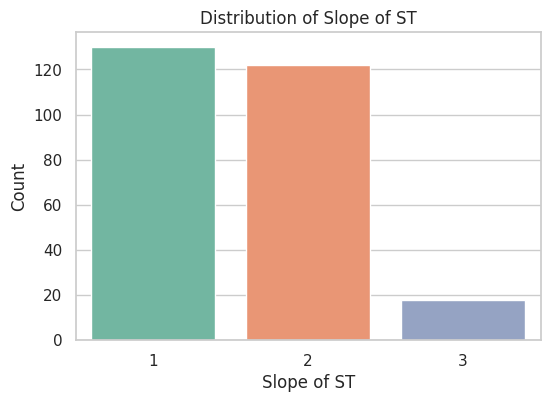

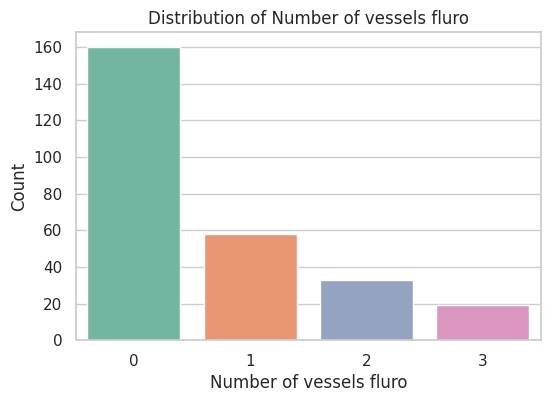

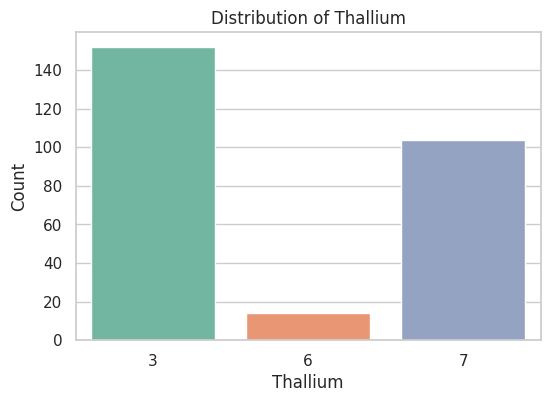

In [17]:
# Univariate analysis for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



# Univariate analysis for categorical features
categorical_columns = df.select_dtypes(include=['object', 'int64']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [18]:
# Separating the features (X) and the target (y)
X = df.drop(columns=['Heart Disease'])  # Features
y = df['Heart Disease']  # Target

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Check the first few rows after normalization
print(X.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            0 non-null      float64
dtypes: float64(2), int64(12)
m

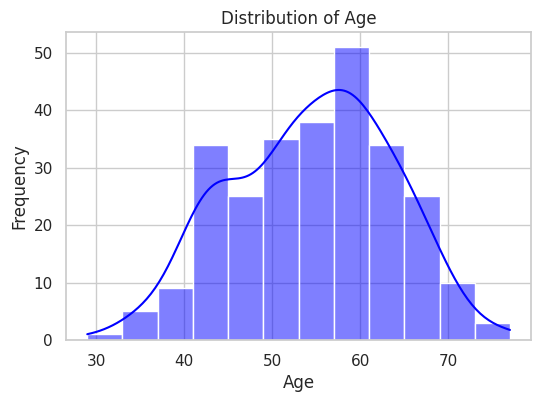

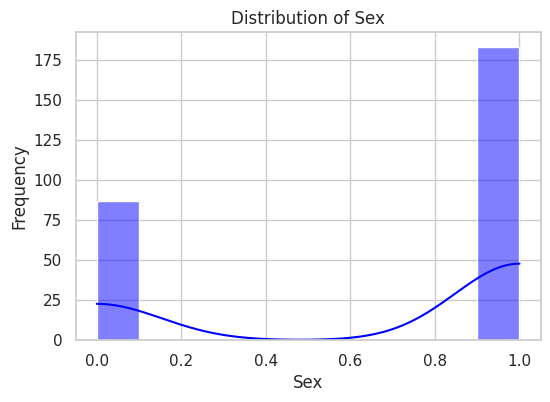

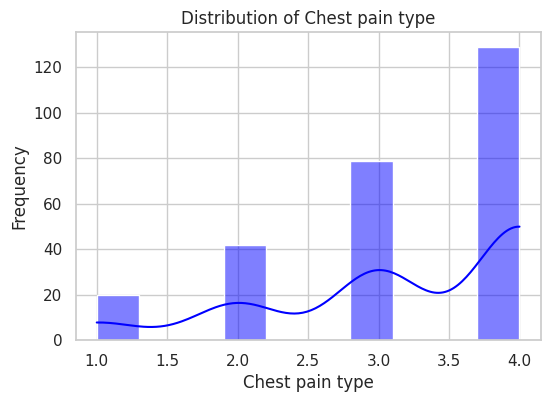

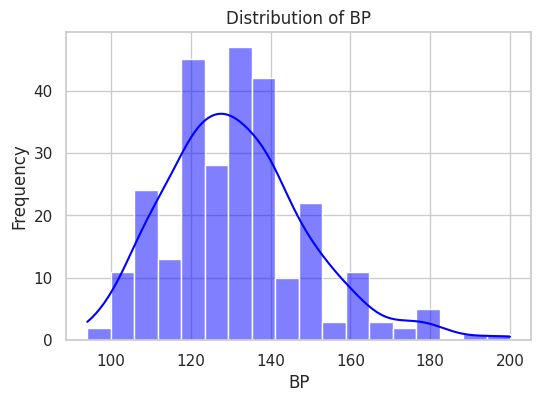

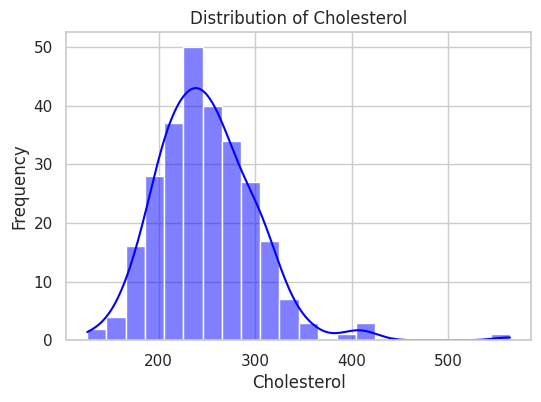

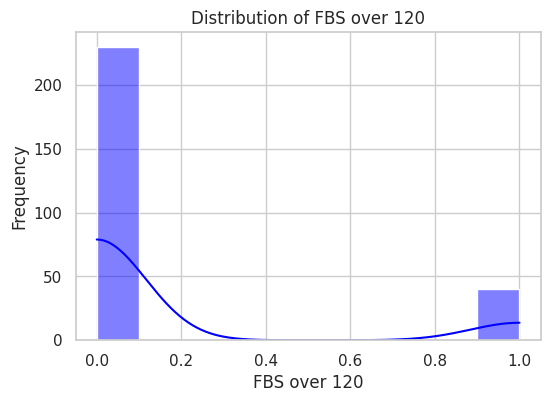

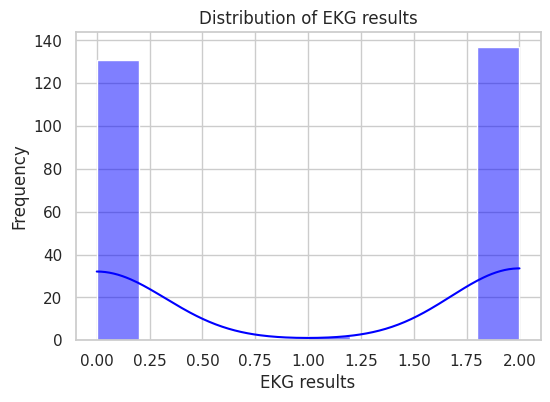

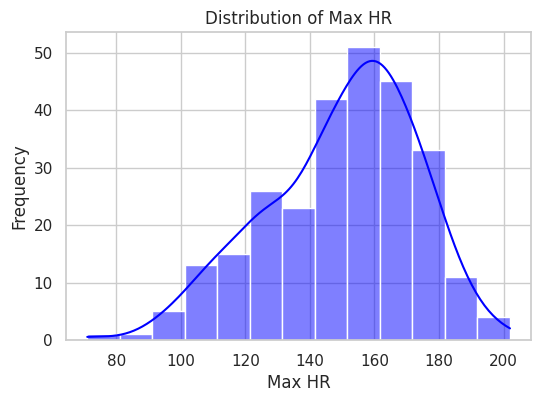

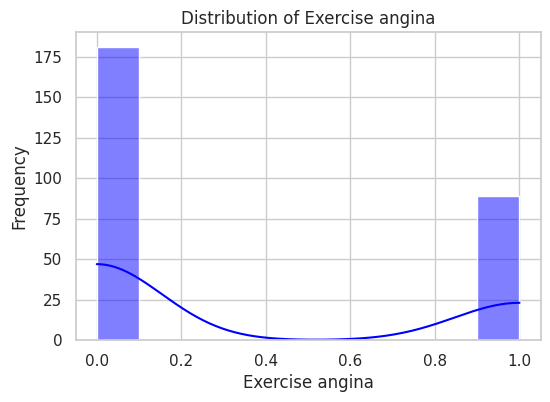

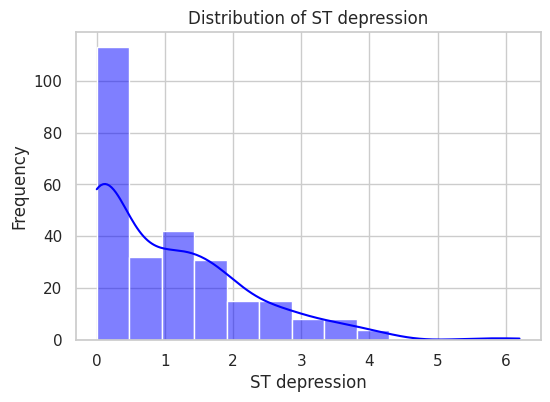

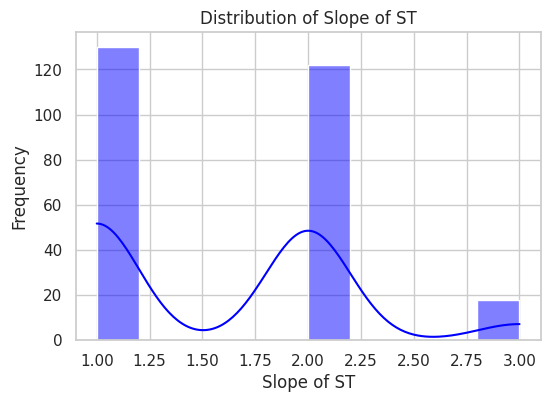

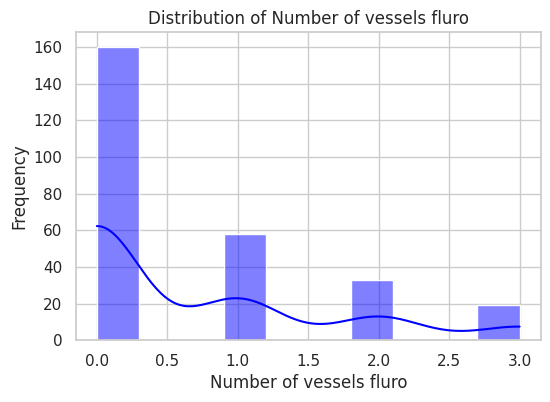

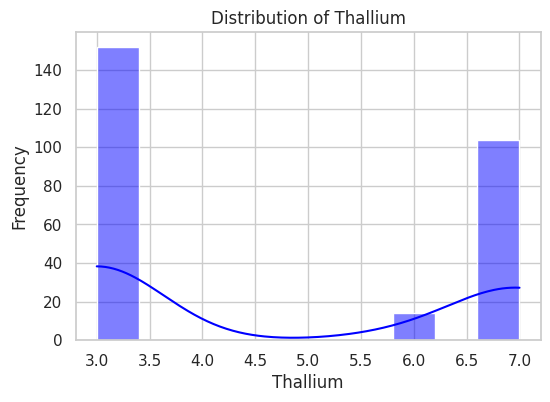

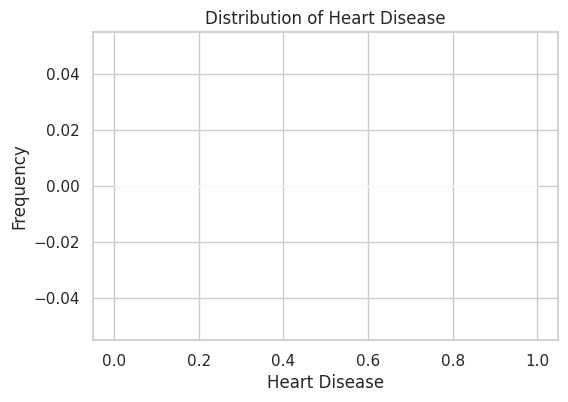

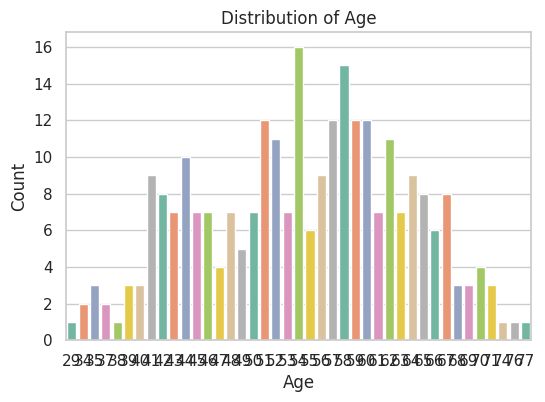

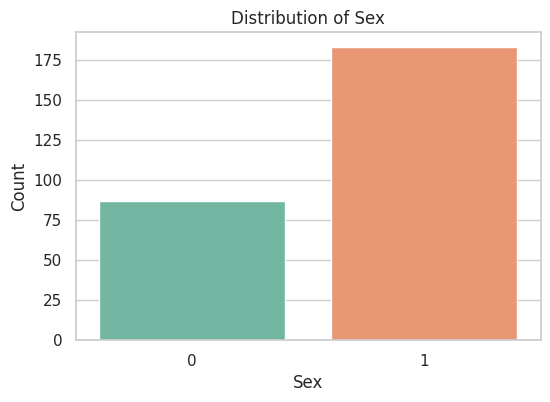

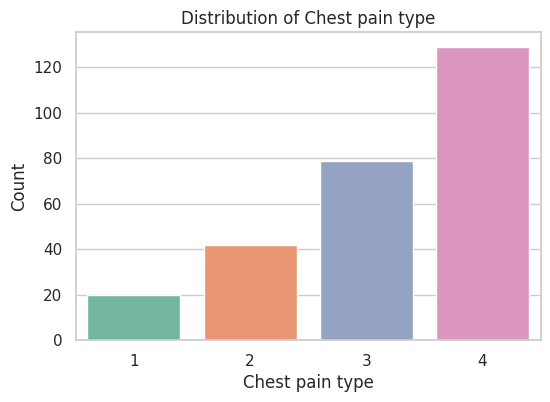

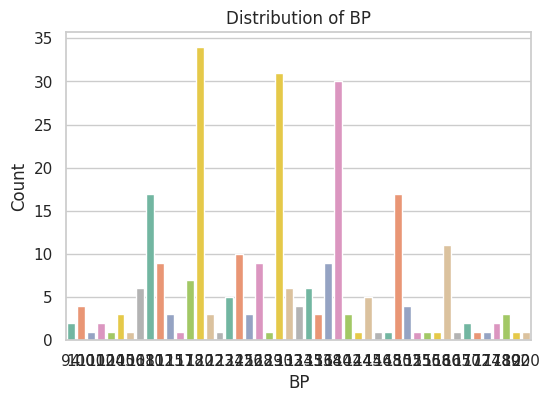

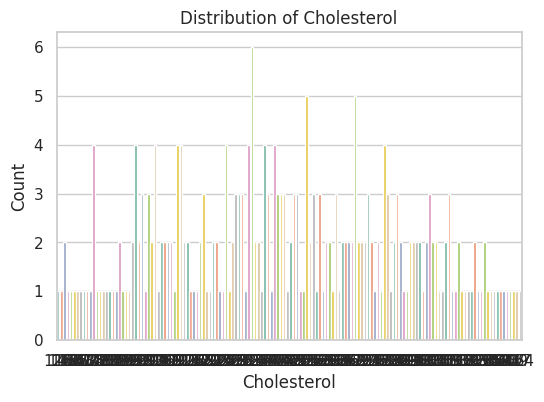

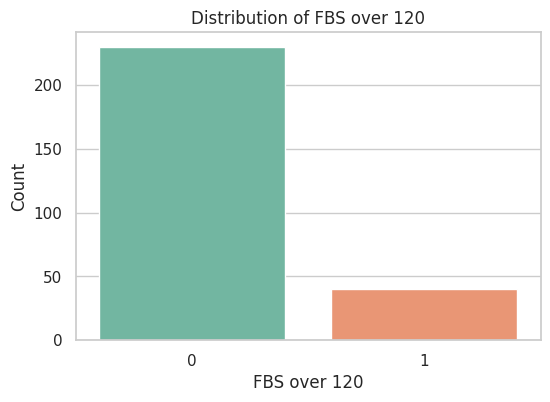

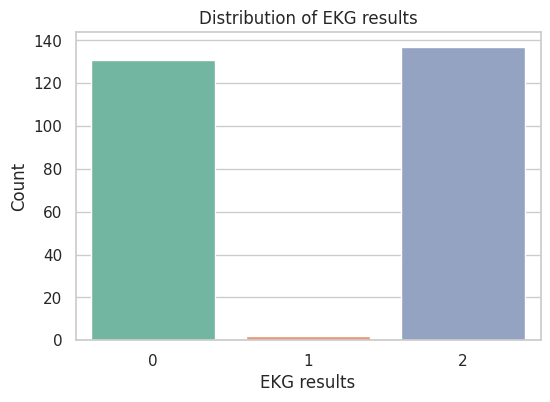

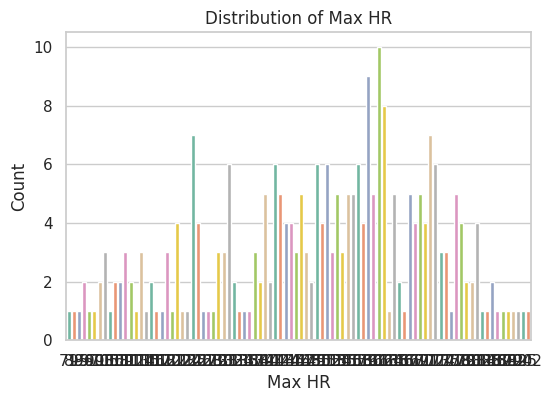

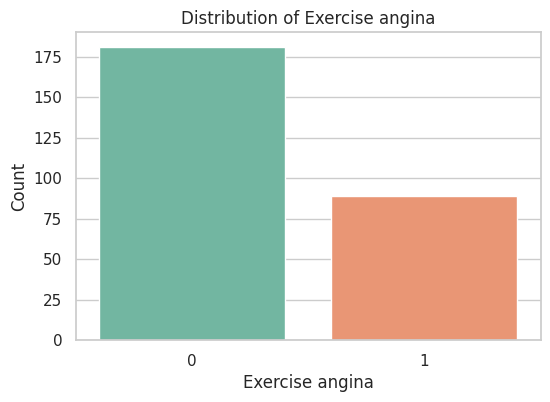

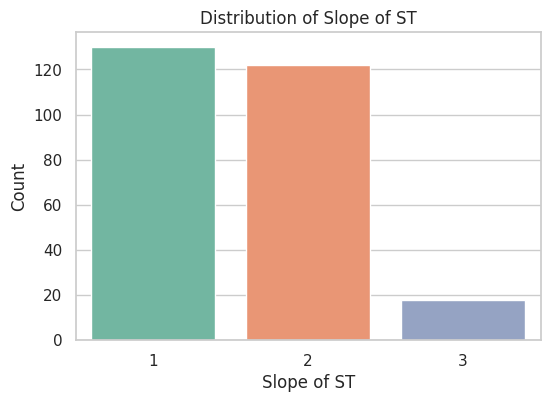

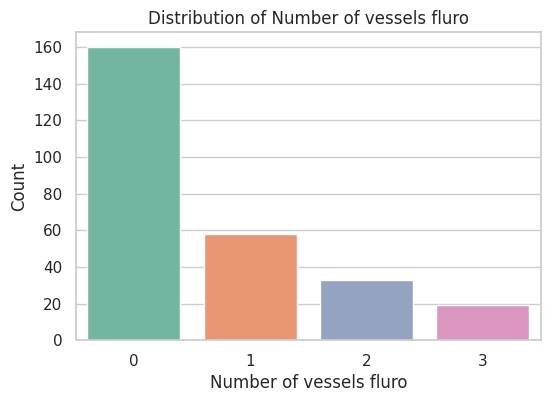

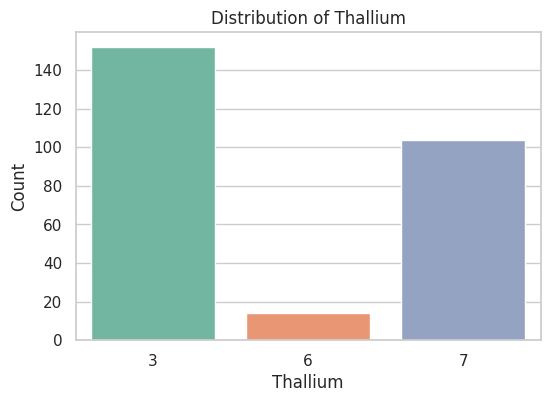

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

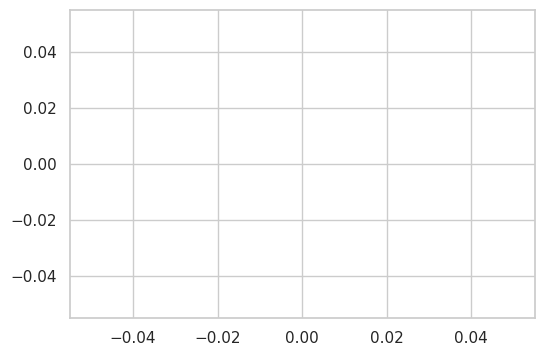

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Initial Data Review
# Display basic information about the dataset
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Step 2: Univariate Analysis

# 2.1: Visualizing Numerical Features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Histogram for numerical features
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



# 2.2: Visualizing Categorical Features
categorical_columns = df.select_dtypes(include=['object', 'int64']).columns

# Bar plot for categorical features
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Step 3: Bivariate Analysis

# 3.1: Numerical Features vs Target (Heart Disease)
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Heart Disease', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel('Heart Disease (0 = Absence, 1 = Presence)')
    plt.ylabel(col)
    plt.show()

# 3.2: Categorical Features vs Target
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Heart Disease', data=df, palette='Set2')
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Step 4: Correlation Analysis
# 4.1: Correlation Heatmap for numerical features
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step 5: Pair Plots for feature relationships
# We can select a subset of features to plot pairwise relationships
sns.pairplot(df[numerical_columns], hue='Heart Disease', palette='Set2', markers=["o", "s"])
plt.suptitle("Pairplot of Numerical Features vs Heart Disease", y=1.02)
plt.show()

